## Import Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/winemag-data_first150k.csv',index_col=0)

In [4]:
df.head()


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Features
+ Country, designation, points, province, region 1, variety, winery
+ one features for analysing 'description'

In [5]:
description = df['description']

df = df.drop(['description'],axis=1)

## Analysing Data

In [23]:
statistics_points = df.groupby('country')['points'].mean()
print(df.country.unique().tolist())
statistics_points.head()

['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria', 'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa', 'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada', 'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'Unknown', 'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay', 'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil', 'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine', 'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg', 'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France']


country
Albania                   88.000000
Argentina                 85.996093
Australia                 87.892475
Austria                   89.276742
Bosnia and Herzegovina    84.750000
Name: points, dtype: float64

In [38]:
mean_value = statistics_points.reset_index()
mean_value = mean_value['points']
del(mean_value[22])
print(mean_value.tolist())

[88.0, 85.9960930562955, 87.89247528747227, 89.27674190382729, 84.75, 83.24, 85.46753246753246, 88.23979591836735, 86.29676753782668, 82.0, 86.28089887640449, 85.87096774193549, 85.83333333333333, 83.66666666666667, 92.88888888888889, 88.92586975068727, 85.51162790697674, 88.62642740619903, 86.11764705882354, 87.32900432900433, 87.625, 87.17619047619047, 85.0, 85.70270270270271, 84.25, 87.0, 84.8125, 84.76190476190476, 84.71830985915493, 82.0, 88.16666666666667, 87.55421686746988, 88.05768508079669, 84.92086330935251, 87.71428571428571, 83.66666666666667, 88.23404255319149, 87.22542072630647, 81.5, 86.64658925979681, 87.25, 86.0, 88.09615384615384, 87.81878936487331, 88.0, 84.6, 84.6, 84.47826086956522]


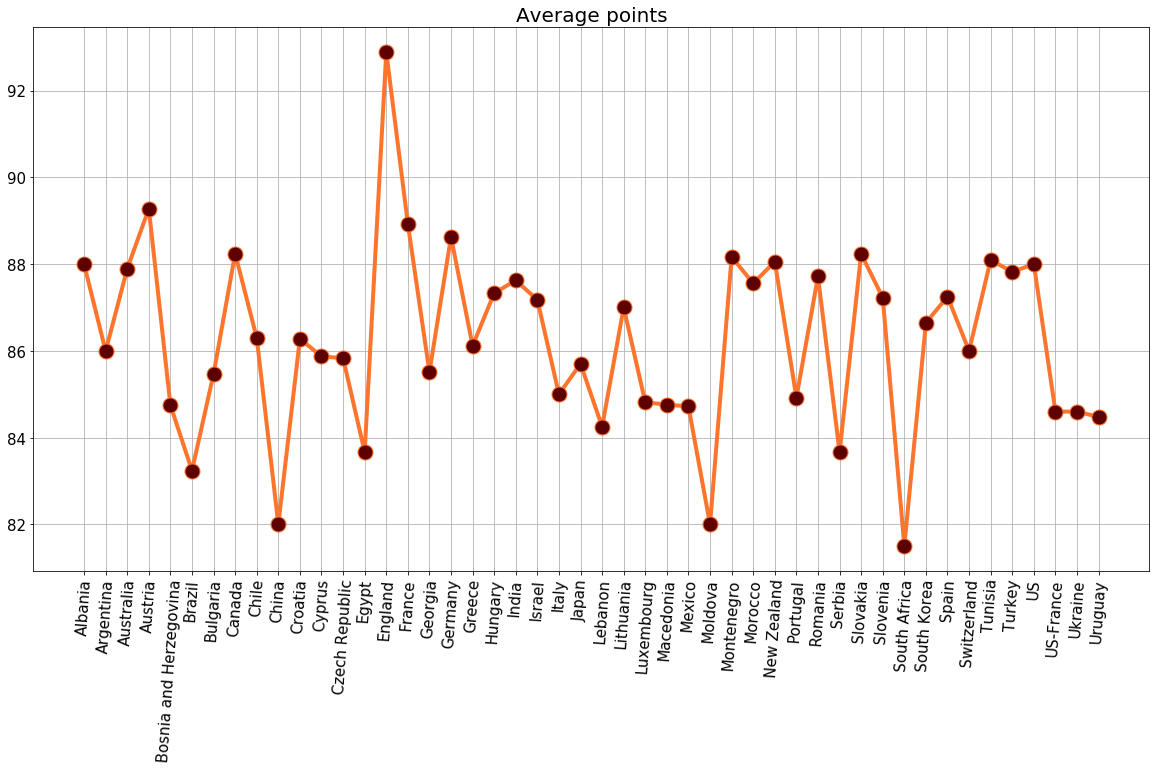

In [44]:
_country = df.country.unique().tolist()
# Deleting Unknown Country
del(_country[22])
_country = sorted(_country)

f = plt.figure(figsize=(20,10))
plt.plot( _country, mean_value,  marker='o', markerfacecolor='#5e0000', markersize=15, color='#fd742d', linewidth=4)
plt.xticks( rotation=86)
plt.tick_params(axis = 'both', labelsize = 15)
plt.grid(True)
plt.title('Average points', fontsize = 20)
plt.show()

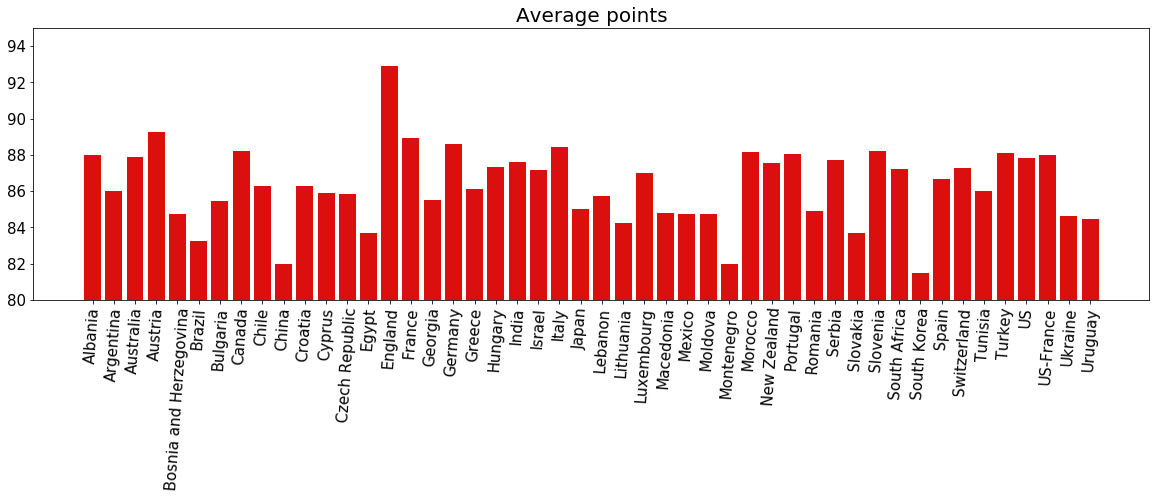

In [7]:
plt.figure(figsize=(20,5))
bars = (_country)
y_pos = np.arange(len(bars))
plt.bar(y_pos, mean_value, color = '#dc0f0f')
plt.xticks(y_pos, bars)
plt.xticks( rotation=86)
plt.ylim(80,95)
plt.title('Average points', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)
plt.show()


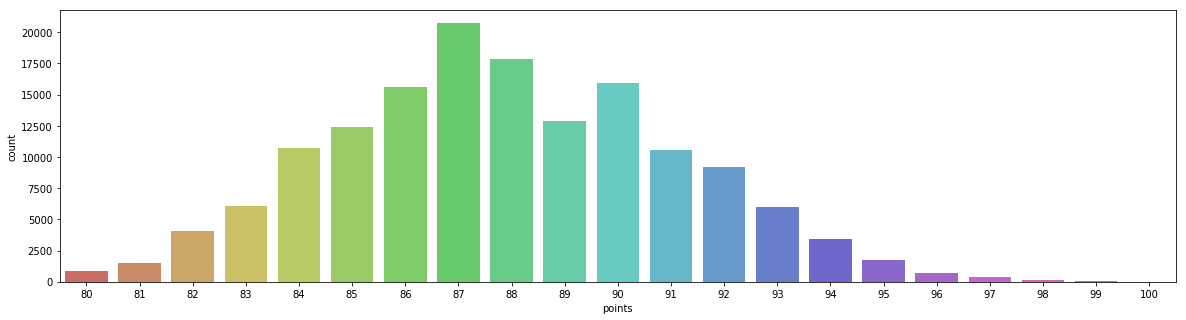

In [8]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='points',data = df, palette='hls' )
plt.show()

## Data wrangling

In [9]:
df.isnull().sum()

country            5
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

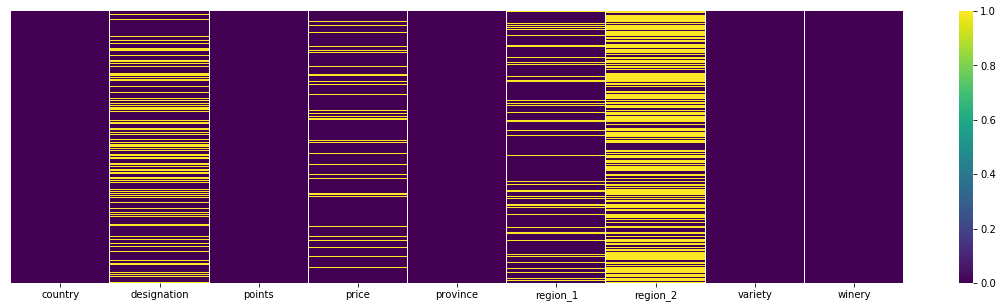

In [10]:
f = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap= 'viridis')

Text(0,1,'Boxplot with jitter')

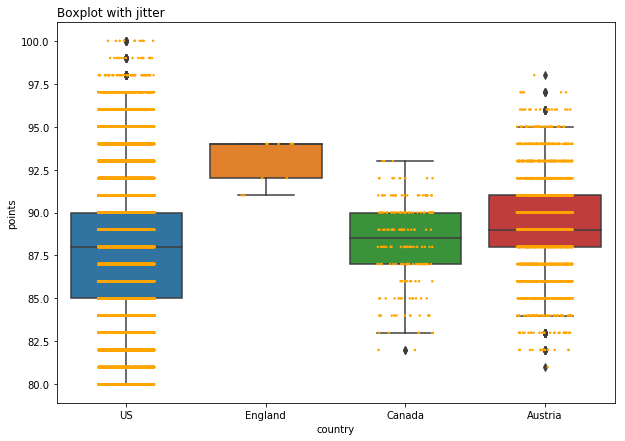

In [11]:
most_country = ['US','England','Canada','Austria']

f = plt.figure(figsize=(10,7))
f = sns.boxplot(x="country",y = "points",data= df, order =most_country )
f = sns.stripplot(x="country",y = "points",data= df, order =most_country, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")


## Cleaning

In [12]:

# delete features with a lot of NaN
df = df.drop(['region_2','designation'],axis=1)
# replace NaN price by average 
df['price'] = df['price'].fillna(df['price'].mean())
# replace NaN by 'Unknown'
df = df.fillna('Unknown')

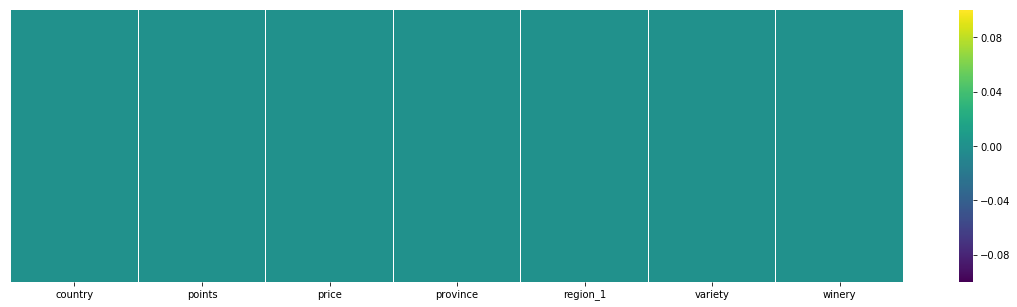

In [13]:
f = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap= 'viridis')